In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the datasets
users_df = pd.read_csv('dataset/Users.csv')
destinations_df = pd.read_csv('dataset/Destinations.csv')


In [3]:
users_df.head()

,UserID,Name,Age,Gender,Email,Location,TravelPreferences,Number of Adults,Number of Children
0,1,Sanjay Verma,20,Male,sanjay.verma701@gmail.com,Karnataka,Adventure,1,3
1,2,Asha Gupta,49,Female,asha.gupta935@gmail.com,Karnataka,Historical,2,2
2,3,Ankit Reddy,28,Male,ankit.reddy252@gmail.com,Karnataka,Wildlife,1,2
3,4,Ankit Nair,46,Male,ankit.nair996@gmail.com,Rajasthan,Wildlife,2,1
4,5,Arun Reddy,29,Female,arun.reddy496@gmail.com,Goa,Nature,2,1


In [4]:
destinations_df.head()

,DestinationID,Name,District,State,Category,BestTimeToVisit,PopularityScore
0,1,Tirupati Balaji Temple,Tirupati,Andhra Pradesh,Religious,October - March,9.5
1,2,Araku Valley,Visakhapatnam,Andhra Pradesh,Hill Station,October - March,8.7
2,3,Borra Caves,Visakhapatnam,Andhra Pradesh,Nature,October - March,8.5
3,4,Srisailam Temple,Kurnool,Andhra Pradesh,Religious,October - February,9.0
4,5,Gandikota,Kadapa,Andhra Pradesh,Historical,October - March,8.6


In [5]:
# Check for missing values
print("\nMissing Values in Users Dataset:")
print(users_df.isnull().sum())
print("\nMissing Values in Destinations Dataset:")
print(destinations_df.isnull().sum())


Missing Values in Users Dataset:
UserID                0
Name                  0
Age                   0
Gender                0
Email                 0
Location              0
TravelPreferences     0
Number of Adults      0
Number of Children    0
dtype: int64

Missing Values in Destinations Dataset:
DestinationID      0
Name               0
District           0
State              0
Category           0
BestTimeToVisit    0
PopularityScore    0
dtype: int64


In [6]:
# Check for Duplicates values
print("\nDuplicates Values in Users Dataset:")
print(users_df.duplicated().sum())
print("\nDuplicates Values in Destinations Dataset:")
print(destinations_df.duplicated().sum())


Duplicates Values in Users Dataset:
0

Duplicates Values in Destinations Dataset:
0


In [7]:
# Display basic information
print("Users Dataset Info:")
print(users_df.info())

print("\nUsers Dataset Summary:")
print(users_df.describe())

Users Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   UserID              2000 non-null   int64 
 1   Name                2000 non-null   object
 2   Age                 2000 non-null   int64 
 3   Gender              2000 non-null   object
 4   Email               2000 non-null   object
 5   Location            2000 non-null   object
 6   TravelPreferences   2000 non-null   object
 7   Number of Adults    2000 non-null   int64 
 8   Number of Children  2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB
None

Users Dataset Summary:
            UserID          Age  Number of Adults  Number of Children
count  2000.000000  2000.000000       2000.000000         2000.000000
mean   1000.500000    41.821000          2.521000            1.515500
std     577.494589    13.987451          1.106423      

In [8]:
print("\nDestinations Dataset Info:")
print(destinations_df.info())
print("\nDestinations Dataset Summary:")
print(destinations_df.describe())



Destinations Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DestinationID    659 non-null    int64  
 1   Name             659 non-null    object 
 2   District         659 non-null    object 
 3   State            659 non-null    object 
 4   Category         659 non-null    object 
 5   BestTimeToVisit  659 non-null    object 
 6   PopularityScore  659 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 36.2+ KB
None

Destinations Dataset Summary:
       DestinationID  PopularityScore
count     659.000000       659.000000
mean      330.000000         8.387253
std       190.381197         0.590159
min         1.000000         6.700000
25%       165.500000         8.000000
50%       330.000000         8.400000
75%       494.500000         8.800000
max       659.000000         9.800000


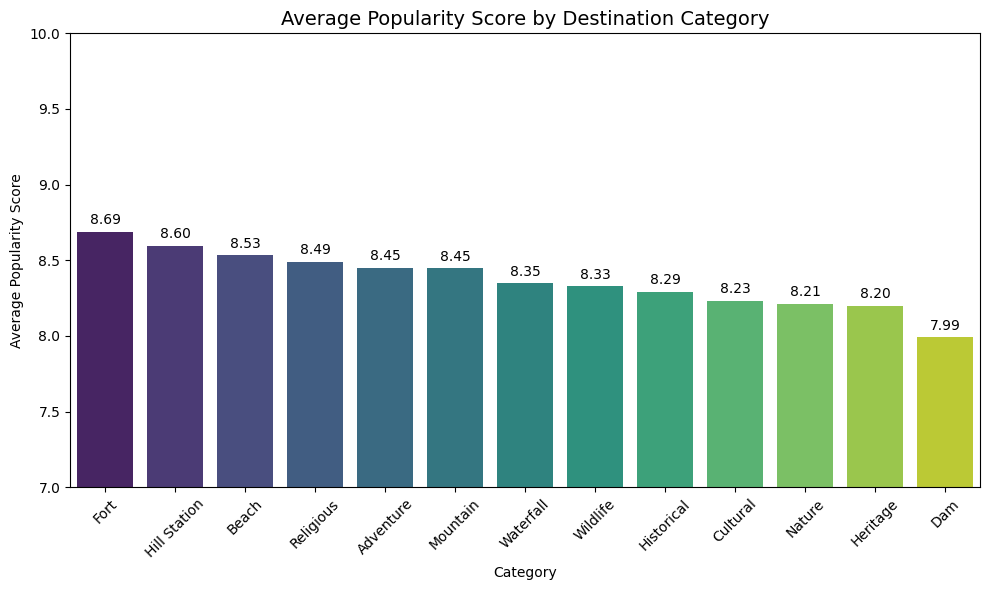

In [9]:
# 1. Popularity of Different Destination Categories
plt.figure(figsize=(10, 6))
category_popularity = destinations_df.groupby('Category')['PopularityScore'].mean().sort_values(ascending=False).reset_index()
bars = sns.barplot(x='Category', y='PopularityScore', data=category_popularity, palette='viridis')
plt.title('Average Popularity Score by Destination Category', fontsize=14)
plt.ylabel('Average Popularity Score')
plt.xticks(rotation=45)
plt.ylim(7, 10)

for i, v in enumerate(category_popularity['PopularityScore']):
    bars.text(i, v + 0.05, f'{v:.2f}', ha='center')

plt.tight_layout()
plt.show()


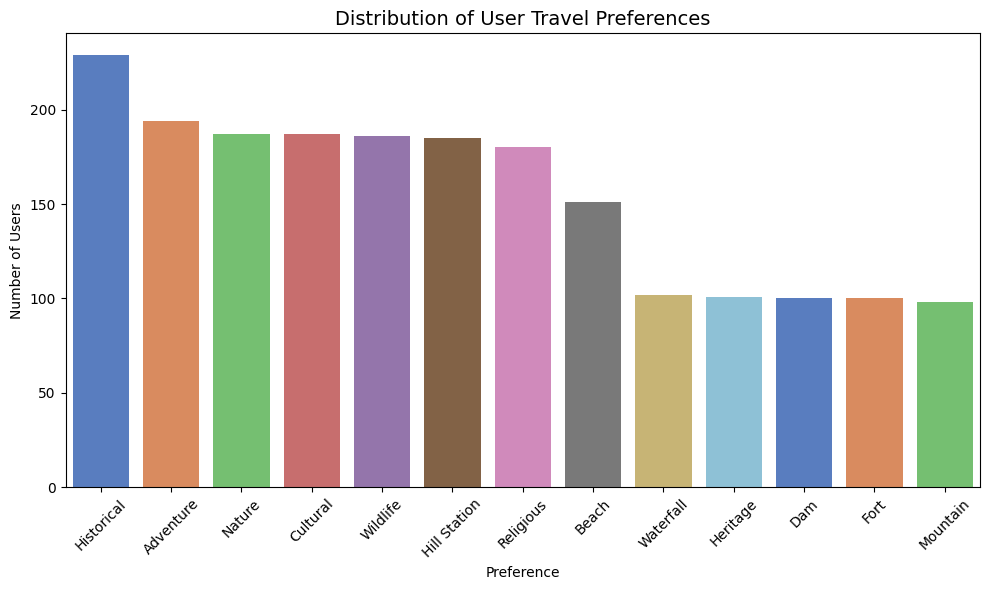

In [10]:
# 3. User Travel Preferences
plt.figure(figsize=(10, 6))
preference_count = users_df['TravelPreferences'].value_counts().reset_index()
preference_count.columns = ['Preference', 'Count']
sns.barplot(x='Preference', y='Count', data=preference_count, palette='muted')
plt.title('Distribution of User Travel Preferences', fontsize=14)
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


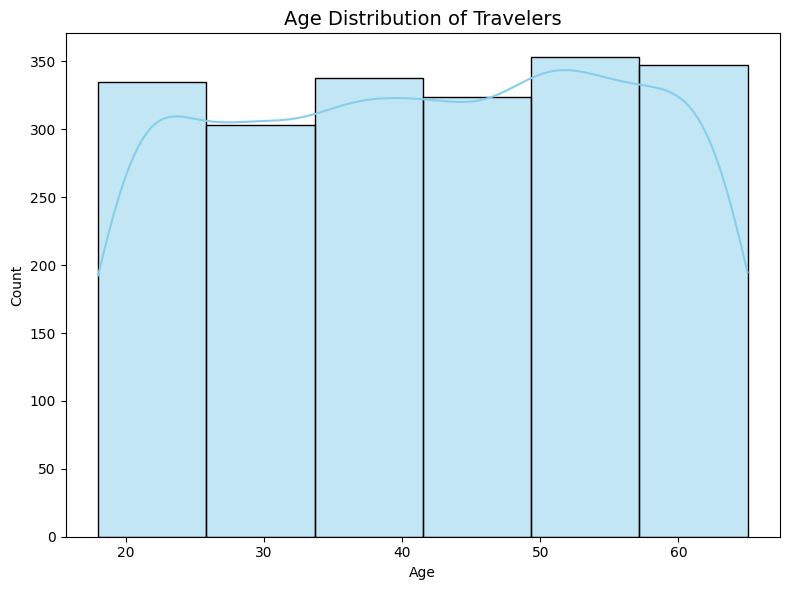

In [11]:
# 4. Age Distribution of Travelers
plt.figure(figsize=(8, 6))
sns.histplot(users_df['Age'], bins=6, kde=True, color='skyblue')
plt.title('Age Distribution of Travelers', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


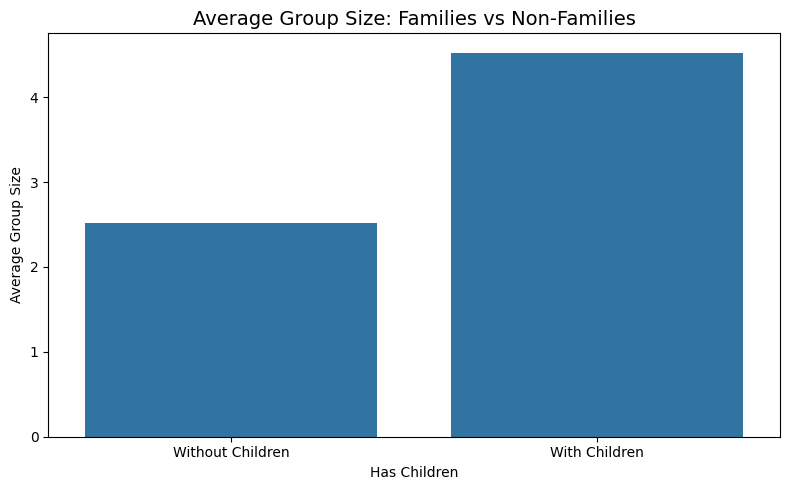

In [12]:
# 5. Family Composition Analysis
plt.figure(figsize=(8, 5))
users_df['Total Group Size'] = users_df['Number of Adults'] + users_df['Number of Children']
users_df['Has Children'] = users_df['Number of Children'] > 0

group_size = users_df.groupby('Has Children')['Total Group Size'].mean().reset_index()
group_size['Has Children'] = group_size['Has Children'].map({True: 'With Children', False: 'Without Children'})

sns.barplot(x='Has Children', y='Total Group Size', data=group_size)
plt.title('Average Group Size: Families vs Non-Families', fontsize=14)
plt.ylabel('Average Group Size')
plt.tight_layout()
plt.show()

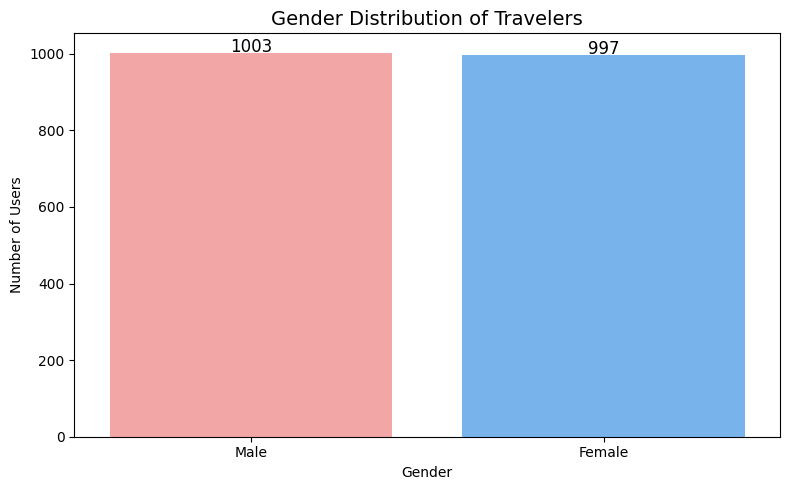

In [13]:
plt.figure(figsize=(8, 5))
gender_count = users_df['Gender'].value_counts().reset_index()
gender_count.columns = ['Gender', 'Count']

bars = sns.barplot(x='Gender', y='Count', data=gender_count, palette=['#ff9999', '#66b3ff'])
plt.title('Gender Distribution of Travelers', fontsize=14)
plt.ylabel('Number of Users')
plt.xlabel('Gender')

for i, v in enumerate(gender_count['Count']):
    bars.text(i, v + 1, str(v), ha='center', fontsize=12)

plt.tight_layout()
plt.show()


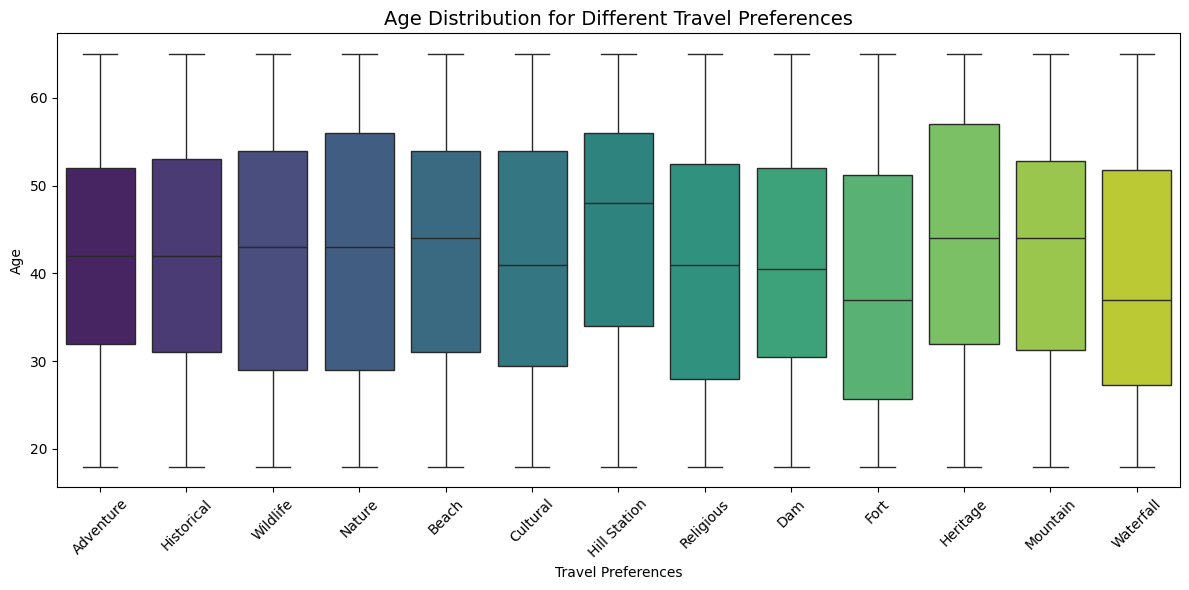

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='TravelPreferences', y='Age', data=users_df, palette='viridis')
plt.title('Age Distribution for Different Travel Preferences', fontsize=14)
plt.xlabel('Travel Preferences')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
